<a href="https://colab.research.google.com/github/ateachment/Moodle-KI/blob/main/KonvergenzDivergenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weight:0 Delta:-4.25 Error:18.0625 Pred:0.0
Weight:0.0180625 Delta:-4.09646875 Error:16.78105621972656 Pred:0.15353124999999998
Weight:0.035472492187499996 Delta:-3.94848381640625 Error:15.590524448422066 Pred:0.30151618359375
Weight:0.052253548407226555 Delta:-3.805844838538574 Error:14.484454935030705 Pred:0.4441551614614257
Weight:0.0684283889710155 Delta:-3.6683586937463684 Error:13.456855505984562 Pred:0.5816413062536318
Weight:0.08401891341943757 Delta:-3.5358392359347808 Error:12.502159102375854 Pred:0.7141607640652193
Weight:0.09904623017216038 Delta:-3.4081070435366367 Error:11.615193620204035 Pred:0.8418929564633633
Weight:0.11353068510719108 Delta:-3.284989176588876 Error:10.791153890306061 Pred:0.9650108234111242
Weight:0.1274918891076938 Delta:-3.166318942584603 Error:10.025575646170077 Pred:1.0836810574153972
Weight:0.14094874461367835 Delta:-3.051935670783734 Error:9.314311338602161 Pred:1.1980643292162658
Weight:0.15391947121450922 Delta:-2.9416844946766716 Error:8.6535

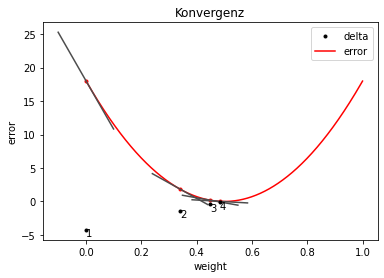

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

goal_pred = 4.25    # Zielvorhersage
input = 8.5         # durchn. Anzahl Fusszehen pro Spieler


def f(x):
    return (input * x - goal_pred)**2
def f_(x):
    return 2*x

def plotErrorParabel():
    weight = np.arange(0,1,0.001)  # numpy array arange(start,end,increment)
    error = f(weight)                    # Funktion x²
    plt.plot(weight,error,'r',label='error')
    #plt.title('y=x² mit 1. Ableitung y\'=2*x (Gradient)')

def plotTangente(e,w,d):
    plt.plot(w,e,'r.')
    factor = 0.2                     # begrenzt Länge der Tangente
    plt.plot([w-0.5*factor, w+0.5*factor], [e-d*factor, e+d*factor], '0.3')

def plotDots(startWeight, alpha):
    weight = startWeight             # Startwert
    for iteration in range(100):     # Anzahl der Durchläufe
        strOut = "Weight:" + str(weight)
        pred = input * weight        # Voraussage
        delta = pred - goal_pred     # Abweichung bzw. Differenz vom erwarteten Ergebnis
        error = delta ** 2
        weight_delta = delta * input # Abweichung in Abhängigkeit vom Eingabewert gewichten 
        if iteration%31 == 0:        # Ausgabe jede 31. Interation. Ungerade, damit Wechsel sichtbar 
            plotTangente(error, weight, weight_delta)
            plt.plot(weight,delta,'k.')       
            plt.text(weight, delta-1, int(iteration/31+1))
        weight = weight - weight_delta * alpha   # neues Gewicht einstellen = lernen mit eingestellter Lernrate       
        strOut += " Delta:" + str(delta) + " Error:" + str(error) + " Pred:" + str(pred)
        print(strOut)   
    
plt.plot([],[],'k.',label='delta')

plotErrorParabel()     # erstmal die komplette error Parabel plotten 

plotDots(0, 0.0005)    # start weight, Lernrate alpha => Konvergenz
#plotDots(0, 0.0275)    #                             => Konvergenz, aber über das Ziel hinaus
#plotDots(0.45, 0.028)  #                             => Divergenz!

plt.title('Konvergenz')
plt.xlabel('weight')
plt.ylabel('error')
plt.legend()
